In [39]:
import pandas as pd
import re 

df = pd.read_csv('listing_data_publish.csv')
df.head()

,listing_id,type,sub_type,start_date,end_date,listing_type,building_age,total_floor_count,floor_no,room_count,size,student_avaliable,mortgage_avaliable,address,furnished,heating_type,price,currency
0,1,Konut,Daire,1/3/19,1/3/19,satılık,3,4,Kot 3,3+1,130.0,NaN,NaN,Kocaeli/Körfez/Fatih,Eşyasız,Kalorifer (Doğalgaz),NaN,NaN
1,2,Konut,Daire,1/2/19,1/2/19,satılık,0,5,1,4+1,175.0,NaN,NaN,Ankara/Yenimahalle/Burç,Eşyasız,Kombi (Doğalgaz),209500.0,TRY
2,3,Konut,Daire,1/2/19,1/2/19,satılık,0,3,1,3+1,125.0,NaN,NaN,Antalya/Kepez/Kütükçü,Eşyasız,Klima,210000.0,TRY
3,4,Konut,Daire,1/2/19,1/2/19,satılık,0,10,7,2+1,72.0,NaN,NaN,İstanbul/Esenler/Kazım Karabekir,Eşyasız,Klima,285000.0,TRY
4,5,Konut,Daire,1/2/19,1/2/19,satılık,0,4,3,1+1,75.0,NaN,NaN,İstanbul/Beylikdüzü/Yakuplu,Eşyasız,Kombi (Doğalgaz),139000.0,TRY


In [40]:
print(len(df['type'].unique()))
print(len(df['sub_type'].unique()))
print(len(df['listing_type'].unique()))
print(len(df['furnished'].unique()))
print(len(df['student_avaliable'].unique()))
print(len(df['mortgage_avaliable'].unique()))
print(len(df['currency'].unique()))
print(df['currency'].unique())


1
1
1
4
1
1
5
[nan 'TRY' 'EUR' 'GBP' 'USD']


In [41]:
# time period calculation using the column start_date and end_date
df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%y')
df['end_date'] = pd.to_datetime(df['end_date'], format='%m/%d/%y')
df['time_period'] = df['end_date'] - df['start_date']
df['time_period'] = df['time_period'].dt.days
df['time_period'].tail()


225732    116
225733     35
225734     10
225735    341
225736    102
Name: time_period, dtype: int64

In [42]:
# def calculate_midpoint_or_average(range_str):
#     # Split the range string into start and end, ignoring "arasi"
#     start, end = map(int, range_str.split('arasi')[0].split('-'))
    
#     # Calculate the midpoint or average
#     return (start + end) / 2


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['building_age'] = le.fit_transform(df['building_age'])
df['building_age'].unique()

array([ 7,  0, 13,  5,  4,  1, 10,  6,  2,  3, 12,  8, 11,  9])

In [44]:

df['total_floor_count'] = le.fit_transform(df['total_floor_count'])
df['total_floor_count'].unique()


array([ 6,  7,  5,  1,  2,  3, 10,  8,  0, 11,  4,  9])

In [45]:
df['floor_no'] = le.fit_transform(df['floor_no'])
df['floor_no'].unique()

array([28,  0, 17, 13, 11, 26, 30, 21, 14, 32, 22, 15,  4, 18, 12,  5,  2,
       19, 24, 27,  9, 23, 16, 20,  1,  6, 34, 33, 29,  8,  3,  7, 31, 10,
       25])

In [46]:
df['room'] = df['room_count'].apply(lambda x: int(str(x).split('+')[0]) if str(x).split('+')[0].isdigit() else 0)
df['living_room'] = df['room_count'].apply(lambda x: int(str(x).split('+')[1]) if len(str(x).split('+')) > 1 and str(x).split('+')[1].isdigit() else 0)
print(df['room'].count())
print(df['living_room'].count())

225737
225737


In [47]:

df['address'] = le.fit_transform(df['address'])
df['heating_type'] = le.fit_transform(df['heating_type'])
df['furnished'] = le.fit_transform(df['furnished'])
df['currency'] = le.fit_transform(df['currency'])

In [48]:
# selecting X and y features
X  = df[['time_period','building_age','total_floor_count','floor_no','room','living_room','size','address','furnished','heating_type','currency']]
y= df['price']

print(X.isnull().sum())
print(y.isnull().sum())

time_period            0
building_age           0
total_floor_count      0
floor_no               0
room                   0
living_room            0
size                 164
address                0
furnished              0
heating_type           0
currency               0
dtype: int64
21


In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = X.copy()
X['size'] = imputer.fit_transform(X[['size']])
X.isnull().sum()

time_period          0
building_age         0
total_floor_count    0
floor_no             0
room                 0
living_room          0
size                 0
address              0
furnished            0
heating_type         0
currency             0
dtype: int64

In [50]:
y = y.fillna(y.mean())
y.isnull().sum()

0

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.values.reshape(-1,1)
y = scaler.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(180589, 11) (45148, 11) (180589, 1) (45148, 1)


In [53]:

from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')


In [55]:
from sklearn.metrics import mean_squared_error

model = Sequential([
        Dense(10, input_dim=11, activation='relu'),
        Dense(20, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1) 
    ])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=2)



y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))


Epoch 1/10
18059/18059 - 48s - loss: 0.4406 - 48s/epoch - 3ms/step
Epoch 2/10
18059/18059 - 50s - loss: 0.4313 - 50s/epoch - 3ms/step
Epoch 3/10
18059/18059 - 49s - loss: 0.4293 - 49s/epoch - 3ms/step
Epoch 4/10
18059/18059 - 50s - loss: 0.4269 - 50s/epoch - 3ms/step
Epoch 5/10
18059/18059 - 44s - loss: 0.4259 - 44s/epoch - 2ms/step
Epoch 6/10
18059/18059 - 47s - loss: 0.4256 - 47s/epoch - 3ms/step
Epoch 7/10
18059/18059 - 51s - loss: 0.4234 - 51s/epoch - 3ms/step
Epoch 8/10
18059/18059 - 49s - loss: 0.4232 - 49s/epoch - 3ms/step
Epoch 9/10
18059/18059 - 45s - loss: 0.4239 - 45s/epoch - 2ms/step
Epoch 10/10
18059/18059 - 47s - loss: 0.4219 - 47s/epoch - 3ms/step
1411/1411 [==============================] - 5s 3ms/step
MSE: 3.0213154679094996


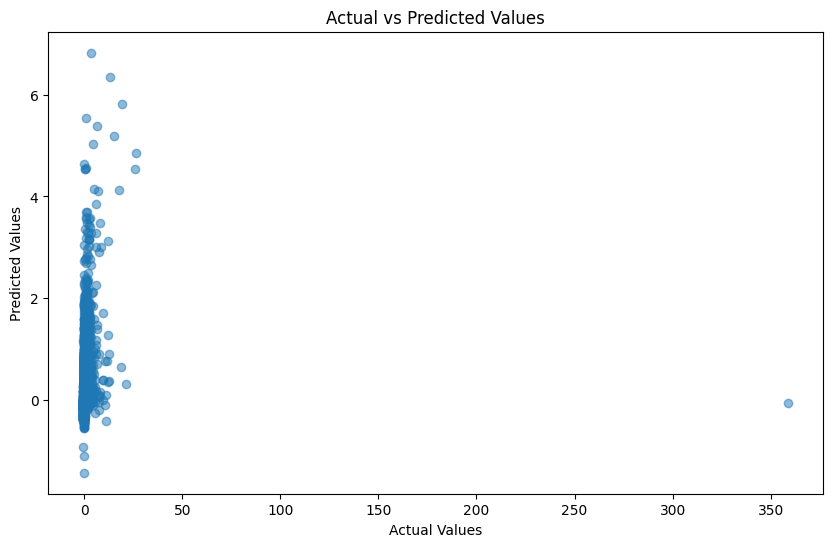

In [76]:


import matplotlib.pyplot as plt

# Assuming y_test are the actual values and y_pred are the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [68]:
# linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

df = df[['time_period','building_age','total_floor_count','floor_no','room','living_room','size','address','furnished','heating_type','currency','price']]

df['size'] = df['size'].fillna(df['size'].mean())
df['price'] = df['price'].fillna(df['price'].mean())

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)



time_period             108.0
building_age              6.0
total_floor_count         2.0
floor_no                  8.0
room                      1.0
living_room               0.0
size                     60.0
address                3538.0
furnished                 0.0
heating_type              0.0
currency                  0.0
price                170000.0
dtype: float64


In [69]:
min_threshold = Q1 - 1.5 * IQR
max_threshold = Q3 + 1.5 * IQR

print(min_threshold)
print(max_threshold)


time_period           -132.0
building_age            -9.0
total_floor_count        2.0
floor_no                -1.0
room                     0.5
living_room              1.0
size                     0.0
address              -4255.0
furnished                1.0
heating_type             8.0
currency                 2.0
price               -86000.0
dtype: float64
time_period             300.0
building_age             15.0
total_floor_count        10.0
floor_no                 31.0
room                      4.5
living_room               1.0
size                    240.0
address                9897.0
furnished                 1.0
heating_type              8.0
currency                  2.0
price                594000.0
dtype: float64


In [70]:

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print(outliers.sum())


time_period           2790
building_age             0
total_floor_count    14082
floor_no             23442
room                  5746
living_room           6546
size                  5964
address                  0
furnished            28637
heating_type         83322
currency              1904
price                15516
dtype: int64


In [71]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print(outliers.sum())

# replace outliers with the median of the column
df = df.mask(outliers, df.median(), axis=1)


# size of the dataset after removing outliers
print(df.shape)

print(df.head())

time_period           2790
building_age             0
total_floor_count    14082
floor_no             23442
room                  5746
living_room           6546
size                  5964
address                  0
furnished            28637
heating_type         83322
currency              1904
price                15516
dtype: int64
(225737, 12)
   time_period  building_age  total_floor_count  floor_no  room  living_room  \
0            0             7                  6        28     3            1   
1            0             0                  7         0     4            1   
2            0             0                  5         0     3            1   
3            0             0                  6        17     2            1   
4            0             0                  6        13     1            1   

    size  address  furnished  heating_type  currency          price  
0  130.0     2564          1             8         2  308794.894203  
1  175.0      517          1 

In [72]:
scaler = StandardScaler()
X = df[['time_period','building_age','total_floor_count','floor_no','room','living_room','size','address','furnished','heating_type','currency']]
X = scaler.fit_transform(X)

y = df['price'].values.reshape(-1,1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

regressor.fit(X_train, y_train)
y_pred2 = regressor.predict(X_test)
print('MSE:', mean_squared_error(y_test2, y_pred2))



MSE: 0.775443656516242


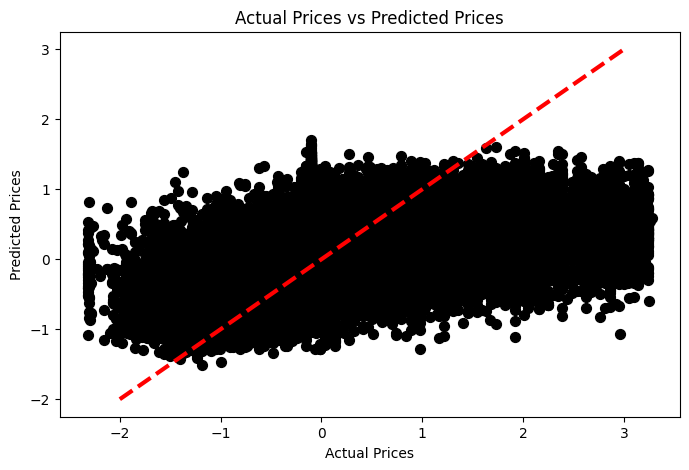

In [75]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.scatter(y_test2, y_pred2, s=50, color='black')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

plt.plot([-2,3],[-2,3] ,color='red', label='Regression line', linewidth=3, linestyle='--')

plt.show()